### Домашнее задание Transformers Training (50 баллов)

В этом домашнем задании требуется обучить несколько Transformer-based моделей в задаче машинного перевода. Для обучения можно воспользоваться текущим проектом, так и реализовать свой пайплайн обучения. Если будете использовать проект, теги **TODO** проекта отмечают, какие компоненты надо реализовать.
В ноутбуке нужно только отобразить результаты обучения и выводы. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Ваш код обучения нужно выложить на ваш github, в строке ниже дать ссылку на него. В первую очередь будут оцениваться результаты в ноутбуке, код нужен для проверки адекватности результатов. 

Обучать модели до конца не нужно, только для демонстрации, что модель обучается и рабочая - снижение val_loss, рост bleu_score.

#### Сcылка на ваш github с проектом(вставить свой) - https://github.com/alexey-zhavoronkin/Seq2SeqModels/

Ноутбук с результатами выкладывать на ваш **google диск** курса. 

### Данные

`
wget https://www.manythings.org/anki/rus-eng.zip && unzip rus-eng.zip
`

Модели нужно обучить на задаче перевода с английского на русский. 

### Обучение Seq2seq Transformer модель(25 баллов)

Реализуйте Seq2seq Transformer. В качестве блока трансформера можно использовать https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html. В качестве токенизатора воспользуйтесь HuggingFace токенизатор для source/target языков - https://huggingface.co/docs/transformers/fast_tokenizers
В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. 

Не забудьте остальные элементы модели:
* Мы можем использовать 1 трансформер как энкодер - декодером будет выступать линейный слой. 
* Обучите свой BPE токенизатор - https://huggingface.co/docs/transformers/fast_tokenizers
* Матрицу эмбеддингов токенов
* Матрицу позицонных эмбеддингов
* Линейный слой проекции в target словарь
* Функцию маскирования будущих состояний attention, так как модель авто-регрессионна
* Learning rate schedualer


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, размерность скрытого слоя, количетсво слоев
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [9]:
LEARNING_RATE = 0.001
BATCH_SIZE = 128
EPOCH_NUM = 5000
DROPOUT = 0.1
EMB_SIZE = 256
NHEAD = 8
FFN_HID_DIM = 256
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

In [10]:
import os
import re
import json
import matplotlib.pylab as plt

In [3]:
MATCH_REGEX = re.compile(r"[+-]?\b(\d+([.]\d*)?([eE][+-]?\d+)?|[.]\d+([eE][+-]?\d+)?)\b")

def extract_values(string):
    result = dict()
    params = ['val_loss', 'train_loss', 'bleu_score']
    if "train_loss" in string:
        found_vals = [re_match[0] for re_match in re.findall(MATCH_REGEX, string)]
    
        if len(params) == len(found_vals):
            for name, val in zip(params, found_vals):
                result[name] = float(val)
    return result

def plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
    
    ax1.plot(range(len(train_loss_list)), train_loss_list, label='train loss')
    ax1.plot(range(len(val_loss_list)), val_loss_list, label='val loss')
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('loss')
    ax1.legend()
    
    ax2.plot(range(len(val_bleu_list)), val_bleu_list, label='val bleu')
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('BLEU')
    ax2.legend()
    
    fig.suptitle(run_name, fontsize=20)
    plt.show()

305 305 305


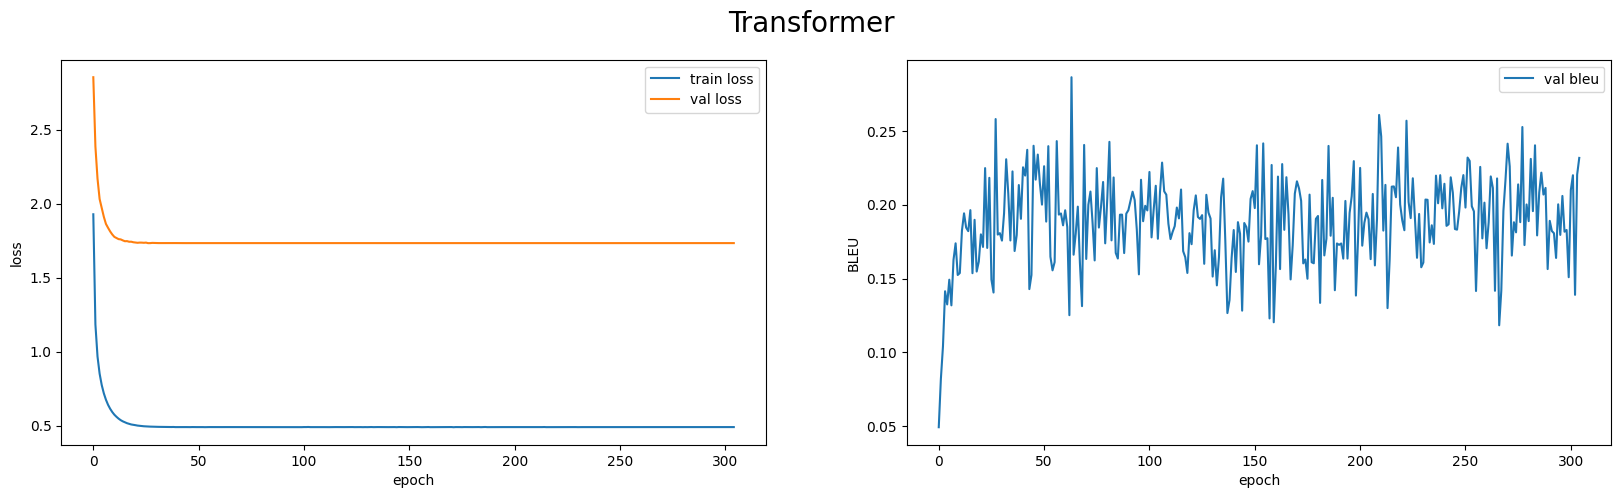

In [4]:
DATAPATH = './Seq2SeqTransformer/training_logs'
progress_file_path = os.path.join(DATAPATH, "progress_log.txt")
file_content = open(progress_file_path, 'r').read().split("\n")

train_loss_list, val_loss_list, val_bleu_list = [], [], []
for line in file_content:
    d = extract_values(line)
    if len(d) > 0:
        train_loss_list.append(d['train_loss'])
        val_loss_list.append(d['val_loss'])
        val_bleu_list.append(d['bleu_score'])
    
        
print(len(train_loss_list), len(val_loss_list), len(val_bleu_list))

plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name='Transformer')

Current BLEU:  0.22041856184829006 Val Loss:  1.732689380645752 Train Loss:  0.489291399717330939/480 [00:09<00:00, 59.02it/s]


* when the cat s away the m ice will play ---> без ко та мы ша м раз до ль е ---> когда будет играть на ко шке
* tom had to climb the po le to fix the telephone wi re ---> тому пришлось вз обра ться на стол б чтобы починить телефон ный прово д ---> тому пришлось починить телефон ный стол к ст
* it s probably going to be hard to do that ---> это вероятно будет трудно сделать ---> это наверное будет трудно сделать
* a lot of countries partic ip ated in the o ly m pic games ---> мно жество стран приня ло у части е в о ли м пи й ---> игры стра усы в ско н ди и ла много стра нах в а ти
* tom says he heard mary and john arguing ---> том говорит что слышал как мэри и джон спо ри ли ---> том говорит что слышал какмэри спо рят и джона
* his parents told him to get into a university ---> его родители сказали ему посту пить в уни вер си те т ---> родители сказали ему в уни вер си те т
* i like bro c co li but i hate cau li flower ---> бро к ко ли я люблю а цвет ную ка пу сту терпеть не ---> я ненавижу бро к коли ки но му
* i speak french almost as well as i speak english ---> я говорю по французски почти так же хорошо как по английски ---> я говорю по французски почти так же хорошо как и по английски
* the museum s eas ter n g aller y was closed for cleaning ---> во сто чный зал ху до же ствен ной гал е ре и закры ---> му зейбыл закры т на стой чив на ро ду
* you cannot achieve the impossible without at temp ting the ab sur d ---> нельзя дости чь невозможно го не дела я без ум ных по пы ток ---> не может быть чтобы ты не доста вля ешь не доста т без шу ток

### Fine-tune pretrained T5 (25 баллов)

Реализуйте Seq2seq Pretrained T5. Воспользуйтесь https://huggingface.co/docs/transformers/model_doc/t5 предобученной моделью. В качестве максимальной длинны возьмите предложения длинной **до 15 слов**, без каких либо префиксов. Архитектура модели(количетсво слоев, размерность и тд) остается на ваш выбор.

Не забудьте важные аспекты обучения модели:
* Взять готовый t5 токенизатор
* Resize matrix embedding - скорей всего ваша матрица эмбеддингов не будет включать эмбеддинги из вашего сета. Пример обновления матрицы эмбеддингов тут тут https://github.com/runnerup96/Transformers-Tuning/blob/main/t5_encoder_decoder.py
* Learning rate schedualer/Adafactor with constant learning rate


В качестве результатов, приложите слудующие данные:
1) Параметры обучения - learning rate, batch_size, epoch_num, pretrained model name
2) Графики обучения - train loss, val loss, bleu score
3) Примеры переводов вашей модели(10 штук) - source text, true target text, predicted target text

In [8]:
BATCH_SIZE = 128
LEARNING_RATE = 0.001
EPOCH_NUM = 5000
PRETRAINED_MODEL_NAME = "google/t5-efficient-tiny"

18 18 18


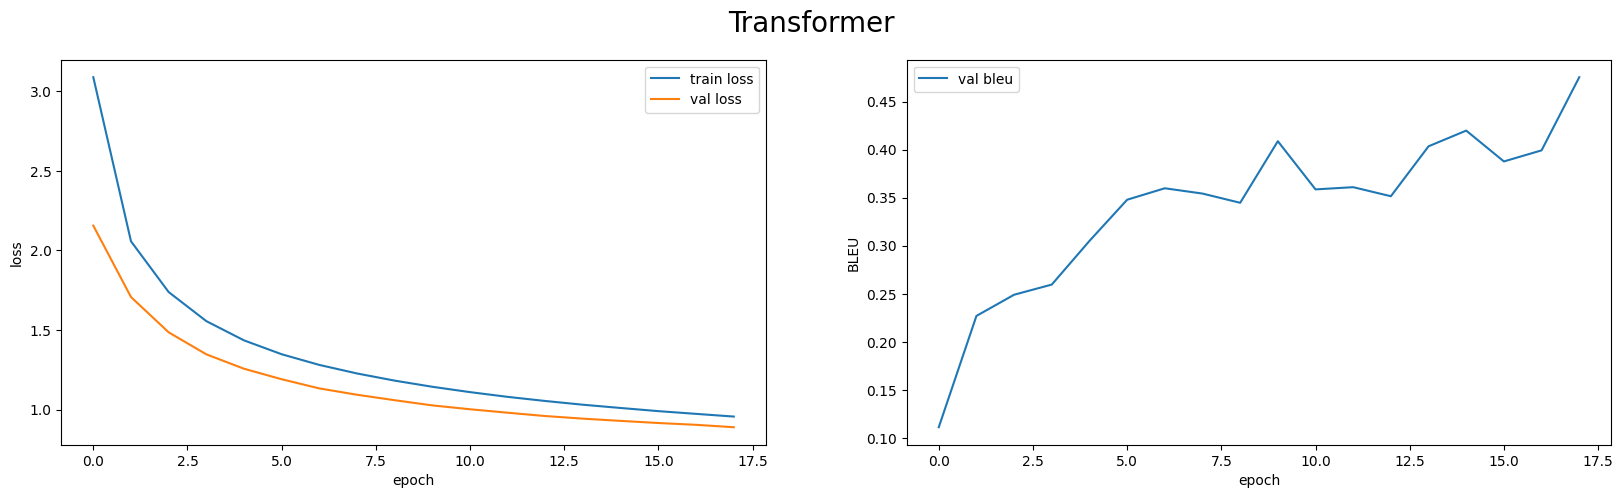

In [6]:
DATAPATH = './Seq2SeqT5/training_logs'
progress_file_path = os.path.join(DATAPATH, "progress_log.txt")
file_content = open(progress_file_path, 'r').read().split("\n")

train_loss_list, val_loss_list, val_bleu_list = [], [], []
for line in file_content:
    d = extract_values(line)
    if len(d) > 0:
        train_loss_list.append(d['train_loss'])
        val_loss_list.append(d['val_loss'])
        val_bleu_list.append(d['bleu_score'])
    
        
print(len(train_loss_list), len(val_loss_list), len(val_bleu_list))

plot_results(train_loss_list, val_loss_list, val_bleu_list, run_name='Transformer')

Current BLEU:  0.47527411045659923 Val Loss:  0.8896030783653259 Train Loss:  0.95653277635574341/481 [04:10<00:00,  1.83it/s]


* As yo u ma ke yo ur b ed  ---> К ак готов ишь сво ю по сте ль, так  ---> К ак вы с дел аете сво ю кро ват и,
* I can't f ind the ma tc hes  ---> Я не мо гу н айт и с пи чки ---> Я не мо гу н айт и э ти
* T om t hi nks Mary is w ron ---> Т ом дум ает, что М э ри не прав ---> Т ом дум ает, что М э ри не прав
* Don't p ut yo ur se lf o ut ---> Не бе спо кой тесь из - за меня. ---> Не у бира йся.
* The l ig ht w as so st ron  ---> С вет бы л так ой с иль ный, что Т ---> С вет бы л так ой с иль ный.
* He will ne ver vi sit the town ag ain. ---> О н больше ник о гда не по с ети  ---> О н больше ник о гда не по с ети
* T om alw ays t ra v el s by ---> Т ом в сегда пу теше ствует на ма шин е ---> Т ом в сегда пу теше ствует мол ния.
* T here's a lo t of t ra ---> Н а э той ули це о чень о ---> В э том го ду м ного пу теше ствия.
* We t alk ed ab o ut what we c ould ---> М ы сказ али о том, что мо гли бы ---> М ы говорили о том, что мо гли бы с
* T om alw ays sit s in the b ac  ---> Т ом в сегда си дит на зад ней па рт  ---> Т ом в сегда си дит в чё рно м.